In [1]:
import json
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
btc_data_path  = "data/BCHAIN-MKPRU_refine.csv"
gold_data_path = "data/LBMA-GOLD_refine.csv"

# Data

In [3]:
btc_data  = pd.read_csv(btc_data_path).rename(columns={ 'Date': 'date', 'Value': 'btc' })
gold_data = pd.read_csv(gold_data_path).rename(columns={ 'Date': 'date', 'USD': 'gold' })

<AxesSubplot:xlabel='date'>

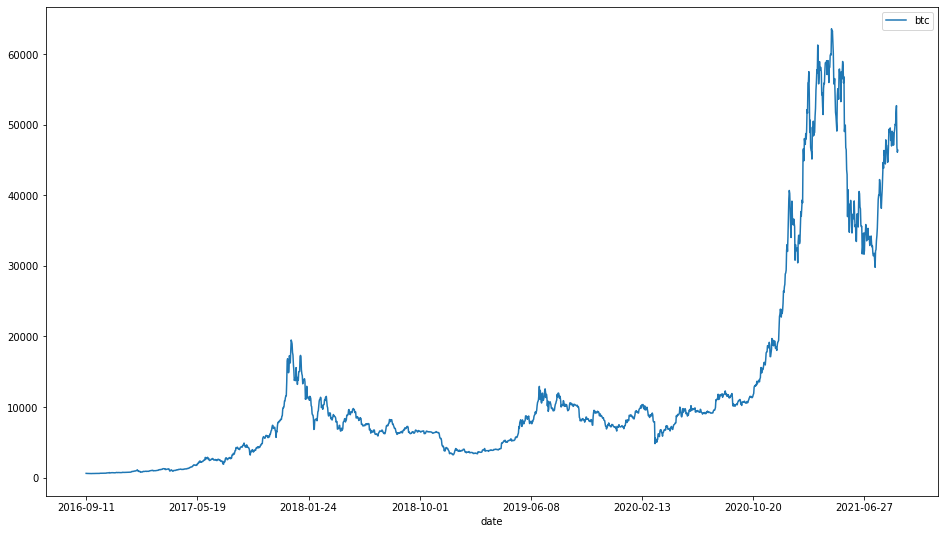

In [4]:
btc_data.set_index('date').plot(figsize=(16, 9))

<AxesSubplot:xlabel='date'>

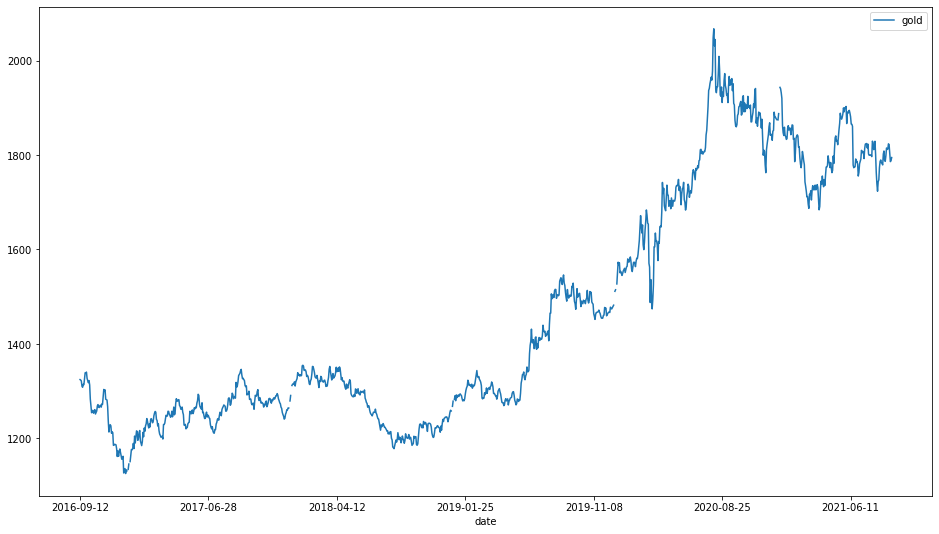

In [5]:
gold_data.set_index('date').plot(figsize=(16, 9))

## Data Processing

### Data Merge

In [6]:
data = pd.merge(left=btc_data, right=gold_data, how='left')
data.insert(data.shape[1], 'gold_tradable', ~np.asarray(data['gold'].isna()))

### Interpolation of Gold Prices

In [7]:
gold_inter = data.gold.interpolate(method='linear')
gold_inter[0] = gold_inter[1]

data.insert(data.shape[1] - 1, 'gold_inter', gold_inter)

### Setting Index

In [8]:
tdi = pd.DatetimeIndex(data.date)
data.set_index(tdi, inplace=True)
data.drop(columns=['date'], inplace=True)

In [9]:
data
data.to_csv("data/data.csv")

## Seasonal Decomposition

In [10]:
gold_decomposed = sm.tsa.seasonal_decompose(data.gold_inter)
btc_decomposed = sm.tsa.seasonal_decompose(data.btc)

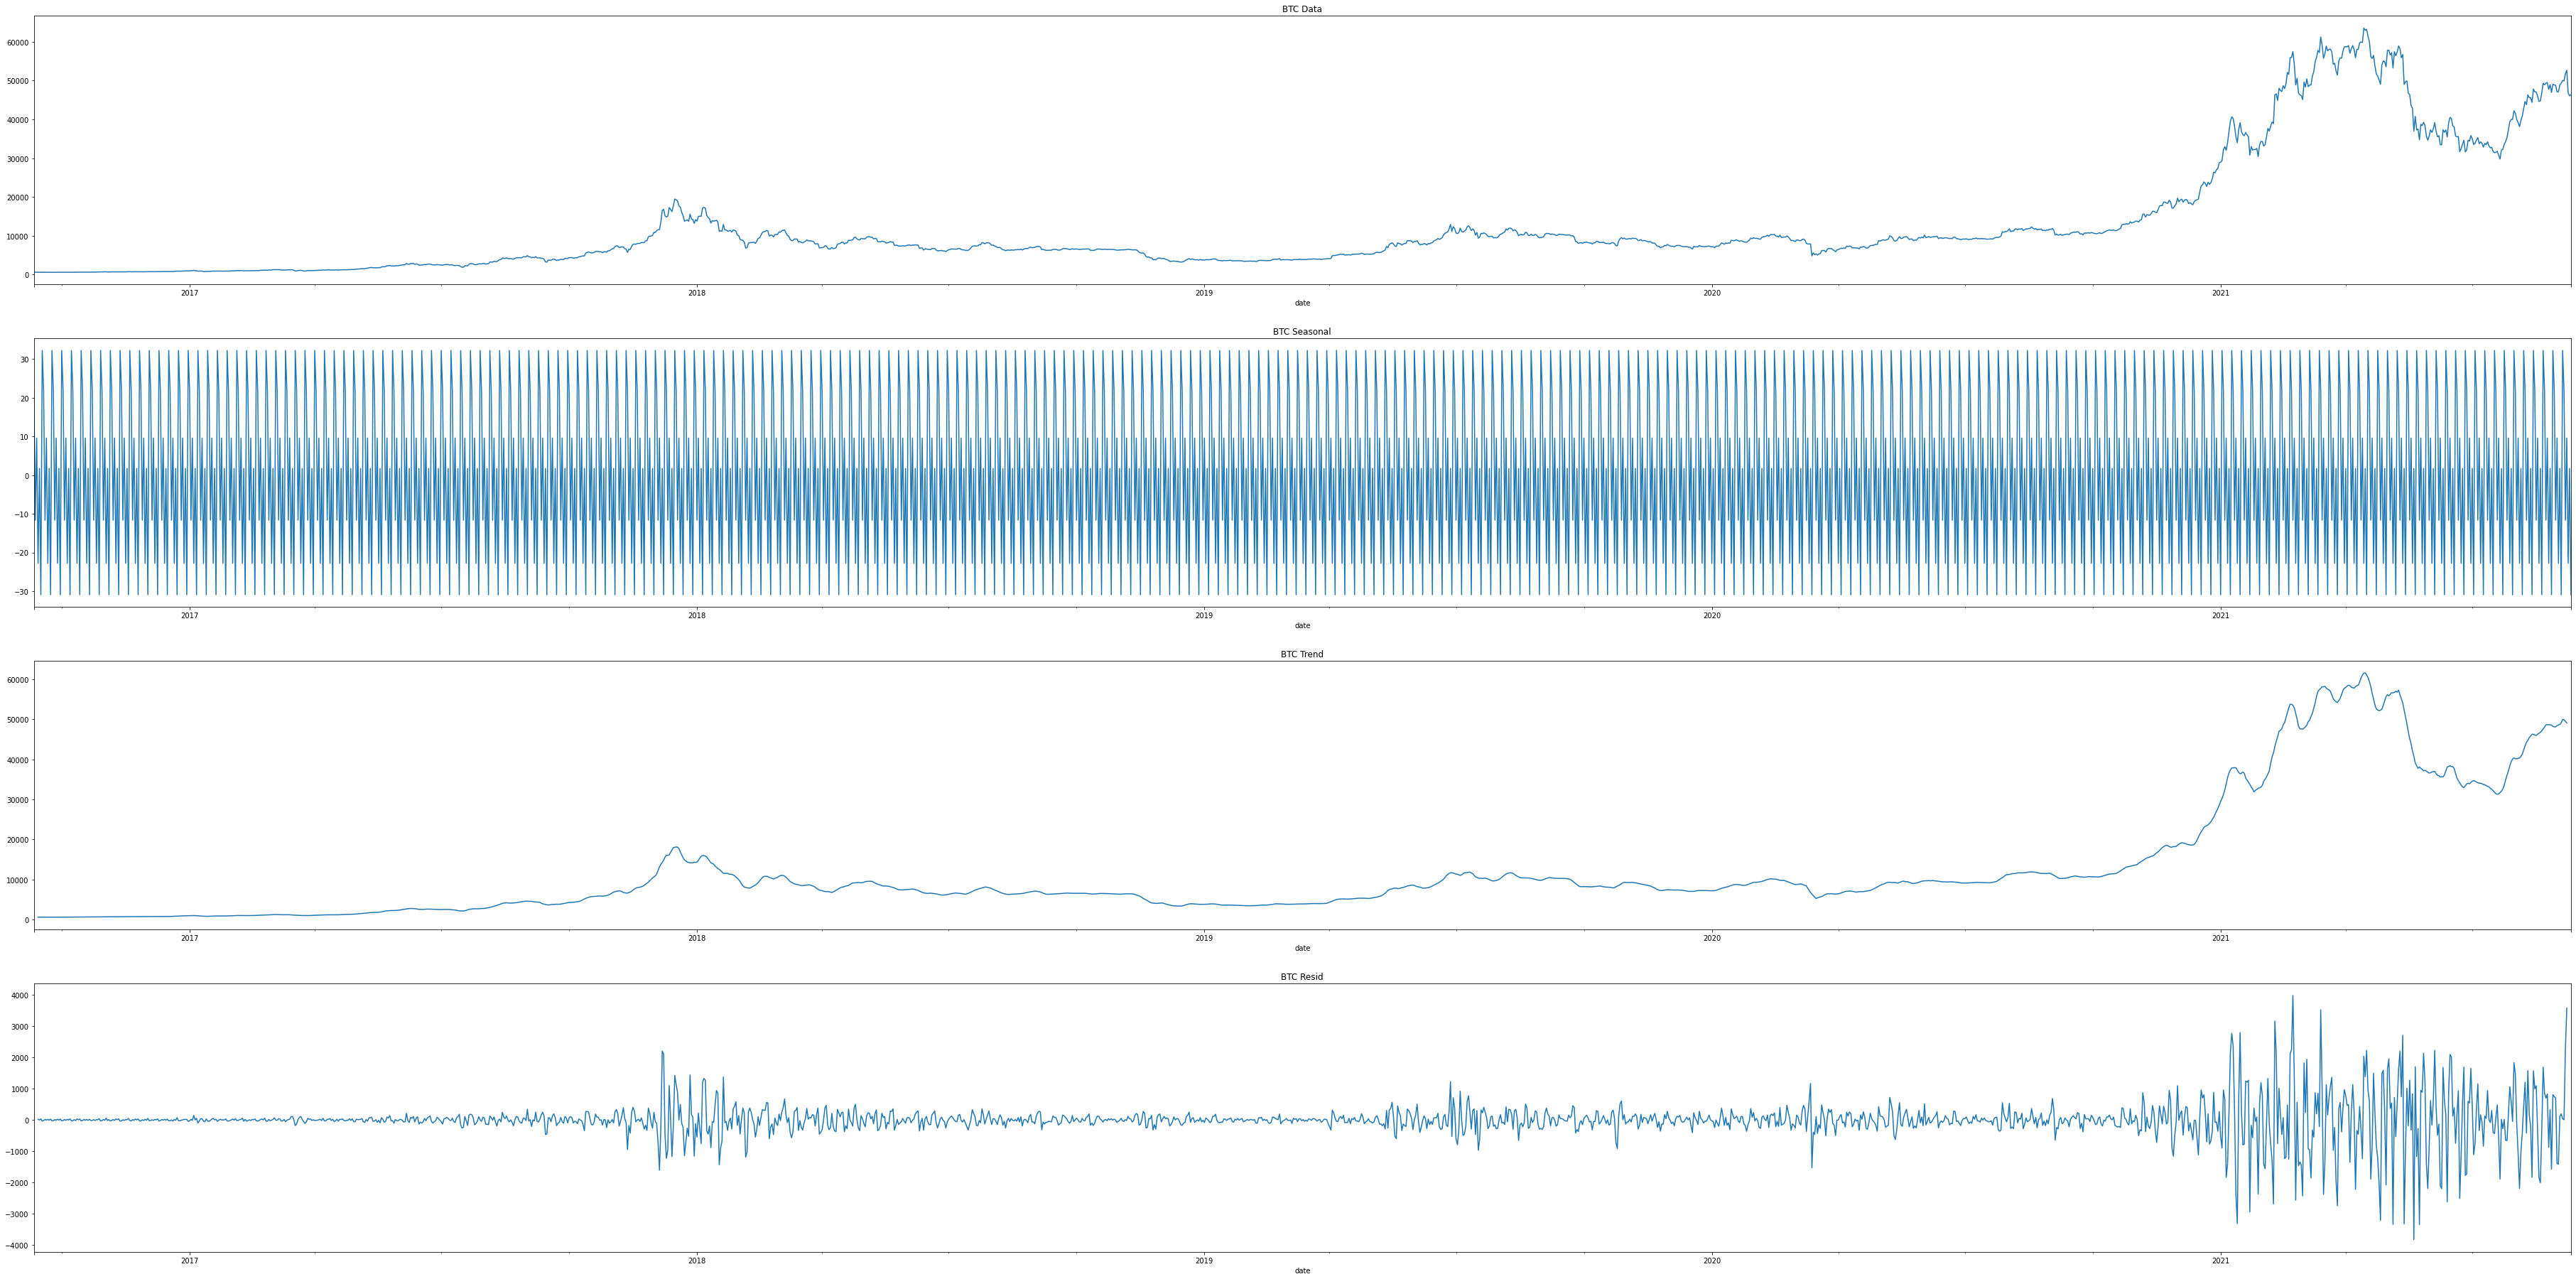

In [11]:
plt.figure(figsize=(32, 32))

plt.subplot(411)
plt.title("BTC Data")
data.btc.plot()

plt.subplot(412)
plt.title("BTC Seasonal")
btc_decomposed.seasonal.plot()

plt.subplot(413)
plt.title("BTC Trend")
btc_decomposed.trend.plot()

plt.subplot(414)
plt.title("BTC Resid")
btc_decomposed.resid.plot()

plt.savefig("data/tsa/btc.pdf")

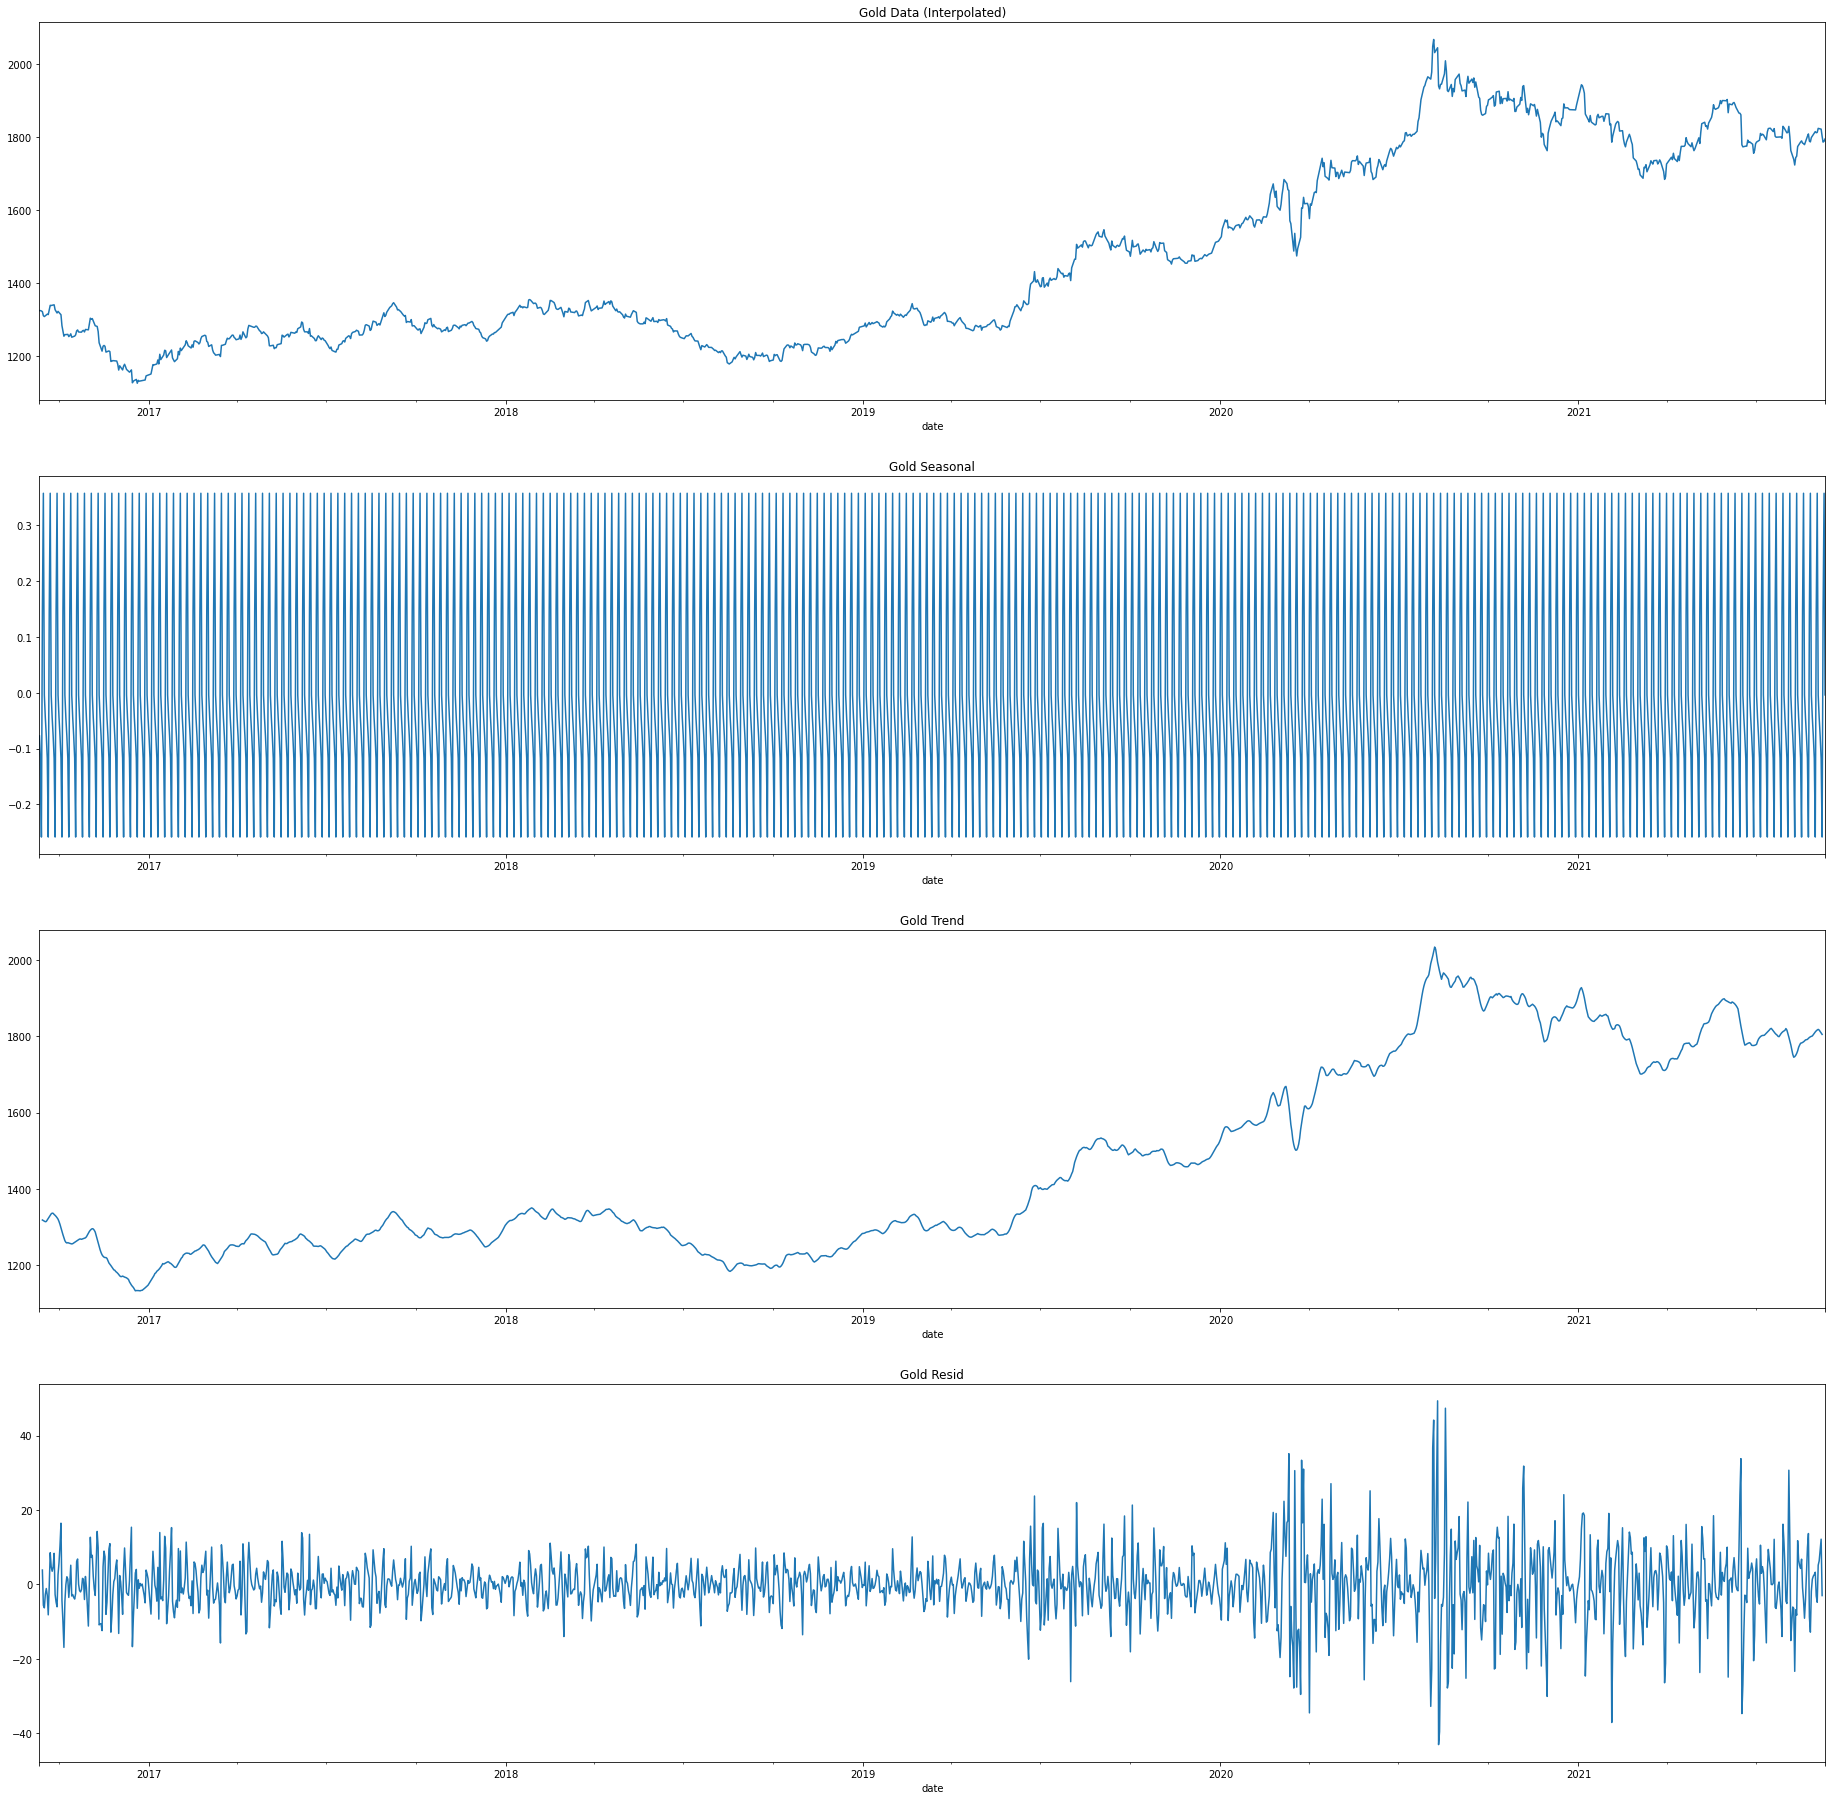

In [13]:
plt.figure(figsize=(32, 32))

plt.subplot(411)
plt.title("Gold Data (Interpolated)")
data.gold_inter.plot()

plt.subplot(412)
plt.title("Gold Seasonal")
gold_decomposed.seasonal.plot()

plt.subplot(413)
plt.title("Gold Trend")
gold_decomposed.trend.plot()

plt.subplot(414)
plt.title("Gold Resid")
gold_decomposed.resid.plot()

plt.savefig("data/tsa/gold_itp.pdf")